<a href="https://colab.research.google.com/github/mrcodean/start-python-/blob/main/Comparative_Analysis_of_Classification_Methods_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Comparitive Analysis Machine Learning Classificaion Methods in Telecom Customer Churn Prediction.


In this project we will be doing a comparitive study between variours classification models in Telecom customers churn prediction. This project is part of Coursera Guided project.This project includes models like ; Logistic Regression , Random Forest Classifier , Navie bayes , Support vector Machine and K Neighbors classifiers, and the best model will be concluded based on the results of classification report and confusion matrix each and in the end we will compare with ROC curve and AUC score to understand in Depth.

Objective :
1. To find the best model of Telecom Customer Churn Prediction.
2. To find which model is giving best results comparitively.

Methodology :
1. Data is collected with the package give in the Coursera Guided Project.
2. The Classification methods used are; Logistic Regression , Random Forest Classifier , Navie bayes , Support vector Machine and K Neighbors classifiers.
3. Conclude with Classification Report, Confution Matrix , ROC curve and AUC score.

## Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, roc_curve , roc_auc_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/INTERNSHIP/Data/telecom_churn.csv')

df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


## Exploratory Data Analysis.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

From the above results we can find that;
1. There are 21 variables which full of numerical continuos value.
2. There is no null values in the dataset.
3. There are total of 5000 datapoints with 21 variables.

In [7]:
df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


From the above summary statistics we can see that the variation between 50% qaurtile and mean is not that much, that represents there will be less outliers.


Text(0.5, 1.0, 'Distribution of Variables')

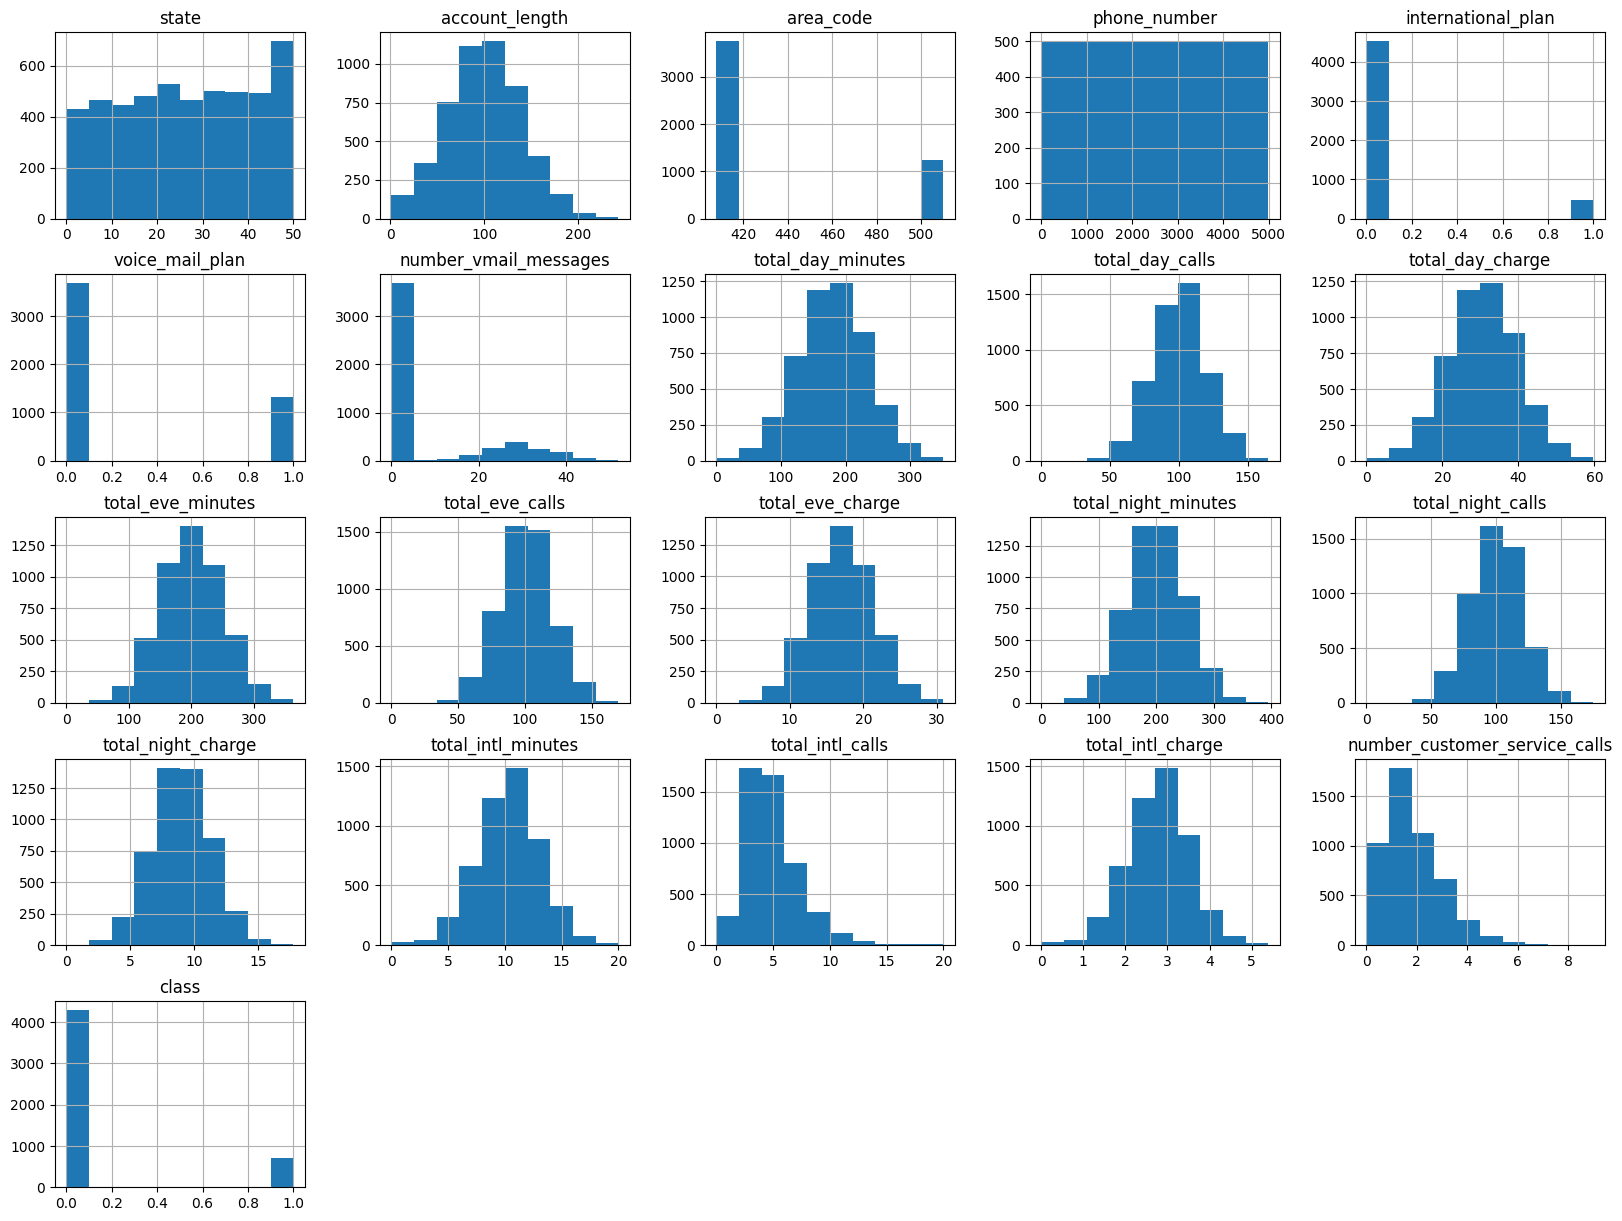

In [8]:
df.hist(figsize= (20,15))
plt.title('Distribution of Variables')

In [9]:
fig = go.Figure(data = [go.Pie(labels = ['Retained (0)' , 'Exited (1)'],
                                values = df['class'].value_counts())])
fig.show()

From the above pie chart we can see that Retained customers are more in number in the dataset.

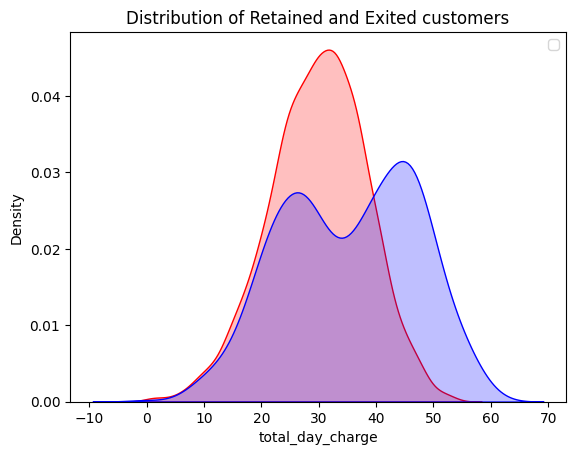

In [10]:
ax = sns.kdeplot(df.total_day_charge[(df['class'] == 0)],
                color = 'Red' ,
                shade = 'True')
ax = sns.kdeplot(df.total_day_charge[(df['class'] == 1)],
                color = 'Blue' ,
                shade = 'True')
plt.title('Distribution of Retained and Exited customers')
plt.legend()


In the above density plot the red ones are the customers who Retainded and the blue are the one who have exited the service. where we can find that, the existed ones are having diualy charge of 50 which is higher that the retaining customers.

## Featuring Engineering

For the initial feature engineering we are excluding the demographic variables and taking other variable for feature testing with Random Forest Fegressor.

In [11]:
x = df.drop(['class' ,'area_code' ,'phone_number' ], axis = "columns")

y = df['class']


In [12]:
x_train , x_test , y_train , y_test = train_test_split(x, y,
                                                       test_size = 0.3 ,
                                                       random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 18)
(1500, 18)
(3500,)
(1500,)


<Axes: >

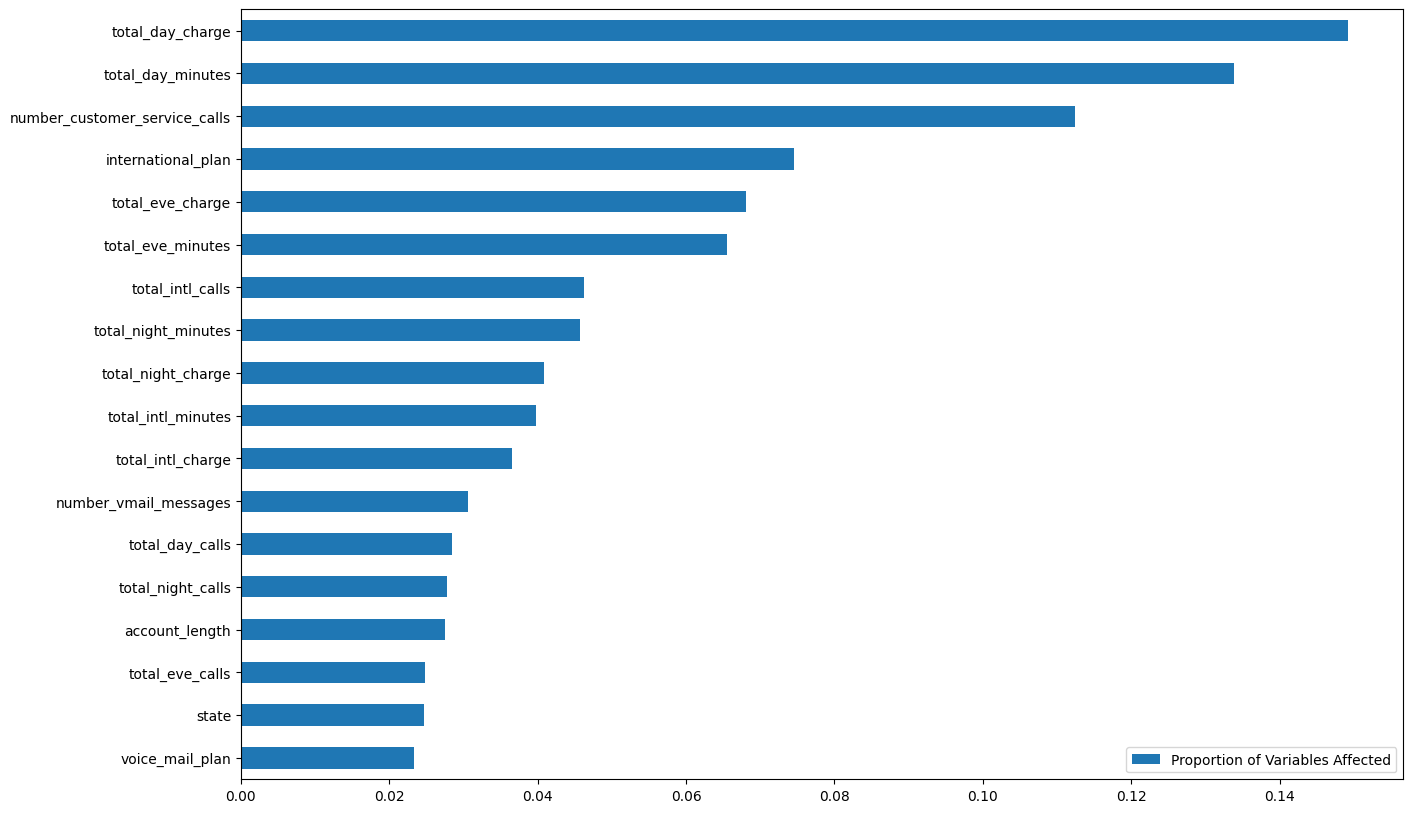

In [13]:
rfc =  RandomForestClassifier()
rfc.fit(x_train , y_train)
feat_scores = pd.DataFrame({'Proportion of Variables Affected': rfc.feature_importances_},
                           index=x.columns)
feat_scores =  feat_scores.sort_values(by = 'Proportion of Variables Affected')
feat_scores.plot(kind = 'barh',
                 figsize = (15,10))


From the above Random Forest Regressor Classifier's feature importance function we got the variables which affected more with the dependent variable, where we found that total_day_charge , total_day_minutes and number_of_customers_service_calls have been affected more.

## Model Development

### Logistic Regression

In [14]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

y_predlr = lr.predict(x_test)

In [15]:
print('Fit of Traning set :' , lr.score(x_train , y_train))
print('Fit of Testing set :' , lr.score(x_test , y_test))

Fit of Traning set : 0.8588571428571429
Fit of Testing set : 0.8573333333333333


There is no problem of under fitting or over fitting in the model.

In [16]:
print(classification_report(y_test , y_predlr))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1298
           1       0.32      0.05      0.09       202

    accuracy                           0.86      1500
   macro avg       0.60      0.52      0.51      1500
weighted avg       0.80      0.86      0.81      1500



This Classification report of Logistic Regression Explians that the precision and recall value for 0 ( Retained ) is good, however the precision and recall value for the 1 ( Exited ) is very low. The score of macro and weighted average is very less in this model.

<Axes: >

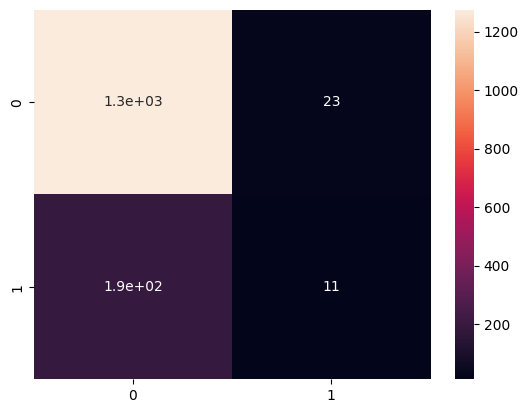

In [17]:
#print(confusion_matrix(y_test , y_predlr))
cfmlr = confusion_matrix(y_test , y_predlr)
cfmlr
sns.heatmap(cfmlr , annot = True)

Discussing with the confusion matrix of Logistic Regression we can find that as the classification report the values predicted as 1 instead of o are 191 and the values that are predicted as 0 instead of 1 are 23. The values correctly predicted for 0 are 1300 and for 1 it is 11. This is very bad model for prediction beacause the predication are  biased.

### Support Vector Machine

In [18]:
svm = LinearSVC(max_iter = 10000)
svm.fit(x_train , y_train)

y_predsvm = svm.predict(x_test)

In [19]:
print('Fit of Traning set :' , svm.score(x_train , y_train))
print('Fit of Testing set :' , svm.score(x_test , y_test))

Fit of Traning set : 0.8568571428571429
Fit of Testing set : 0.8633333333333333


There is no problem of under fitting or over fitting in the model, since the fitted values of training and testing models don't have much difference in their score values.

In [20]:
print(classification_report(y_test , y_predsvm))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1298
           1       0.48      0.22      0.30       202

    accuracy                           0.86      1500
   macro avg       0.69      0.59      0.61      1500
weighted avg       0.83      0.86      0.84      1500



This Classification report of Support vector Machine Explians that the precision and recall value for 0 ( Retained ) is great and the precision value for the 1 ( Exited ) is has been imporved but not much in recall value. The score of macro and weighted average has imporved comparing to  logistic regression in this model.

<Axes: >

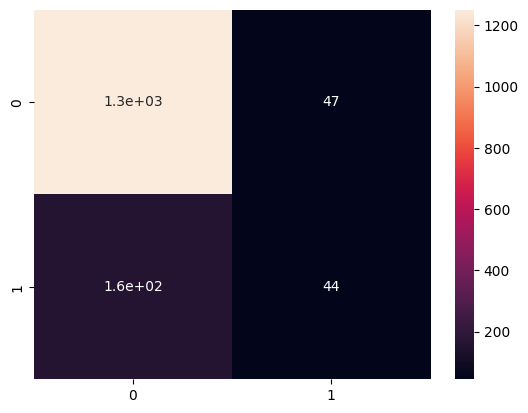

In [21]:
cfmsvm = confusion_matrix(y_test , y_predsvm)

sns.heatmap(cfmsvm , annot = True)

Discussing with the confusion matrix of Support Vector Machine we can find that as the classification report the values predicted as 1 instead of 0 are 160 and the values that are predicted as 0 instead of 1 are 47. The values correctly predicted for 0 are 1300 and for 1 it is 44. This is good model model for prediction, since this does have much errors in prediction.

Note : The values may vary in each run.

#### Support vector Machine with Calibirated Classifier

In [22]:
svm2 = CalibratedClassifierCV(svm)

svm2.fit(x_train , y_train)

y_predsvm2 = svm2.predict(x_test)

In [23]:
print('Fit of Traning set :' , svm2.score(x_train , y_train))
print('Fit of Testing set :' , svm2.score(x_test , y_test))

Fit of Traning set : 0.8611428571428571
Fit of Testing set : 0.87


There is no problem of under fitting or over fitting in the model, since the fitted values of training and testing models don't have much difference in their score values.

In [24]:
print(classification_report( y_test , y_predsvm2))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1298
           1       0.59      0.11      0.18       202

    accuracy                           0.87      1500
   macro avg       0.74      0.55      0.56      1500
weighted avg       0.84      0.87      0.83      1500



This Classification report of Support vector Machine with Calibrated Classifier CV Explians that the precision and recall value for 0 ( Retained ) is great and the precision value for the 1 ( Exited ) is less comparing the normal svm model. The score of macro and weighted average are almost simiral to normal support vector machine model.

<Axes: >

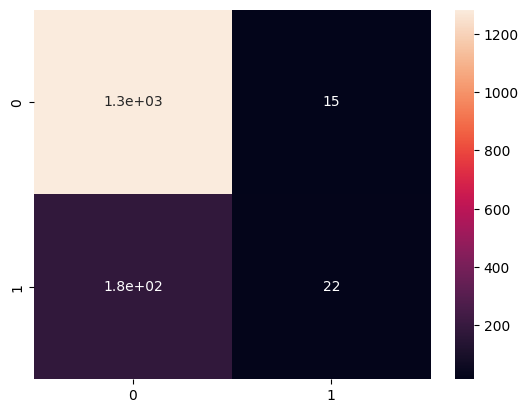

In [25]:
cfmsvm2 = confusion_matrix(y_test , y_predsvm2)

sns.heatmap(cfmsvm2 , annot = True)

Discussing with the confusion matrix of Support Vector Machine with Calibrated Classifier  CV we can find that as the classification report the values predicted as 1 instead of 0 are 180 and the values that are predicted as 0 instead of 1 are 17. The values correctly predicted for 0 are 1300 and for 1 it is 26. This is not good model model for prediction, since this does have errors in prediction.

Note : the values change in each run

### Random Forest Classifier

In [26]:
rfc.fit(x_train , y_train)

y_predrfc = rfc.predict(x_test)

In [27]:
print('Fit of Traning set :' , rfc.score(x_train , y_train))
print('Fit of Testing set :' , rfc.score(x_test , y_test))

Fit of Traning set : 0.9997142857142857
Fit of Testing set : 0.9646666666666667


In this model is seem like the model is overfitted in the traning set, because the score is lesser than the testing set.

In [28]:
print(classification_report(y_test , y_predrfc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1298
           1       0.97      0.76      0.85       202

    accuracy                           0.96      1500
   macro avg       0.97      0.88      0.92      1500
weighted avg       0.96      0.96      0.96      1500



This Classification report of Random Forest Classifier Explians that the precision and recall value for 0 ( Retained ) is great and the precision value for the 1 ( Exited ) have also improved significantly in this model. The score of macro and weighted average are in their best score model.

<Axes: >

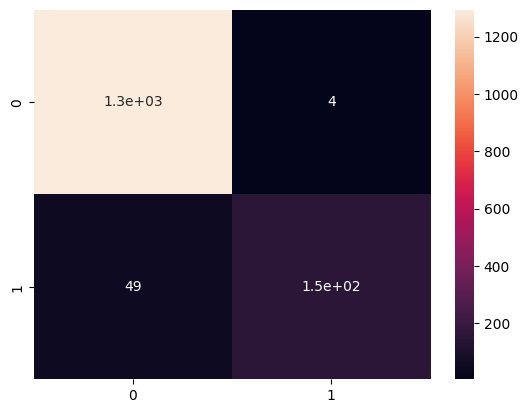

In [29]:
cfmrfc = confusion_matrix(y_test , y_predrfc)

sns.heatmap(cfmrfc , annot = True)

Discussing with the confusion matrix of Random Fores Classifier we can find that as the classification report the values predicted as 1 instead of 0 are 48 and the values that are predicted as 0 instead of 1 are 5. The values correctly predicted for 0 are 1300 and for 1 it is 150. This is a very good model model for prediction, since this does not have much errors in prediction.

### K Neighbours Classifier

In [30]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train , y_train)

y_predknn = knn.predict(x_test)

In [31]:
print('Fit of Traning set :' , knn.score(x_train , y_train))
print('Fit of Testing set :' , knn.score(x_test , y_test))

Fit of Traning set : 0.9042857142857142
Fit of Testing set : 0.8833333333333333


There is no problem of under fitting or over fitting in the model, since the fitted values of training and testing models don't have much difference in their score values.

In [32]:
print(classification_report(y_test , y_predknn))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1298
           1       0.68      0.26      0.37       202

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.87      0.88      0.86      1500



This Classification report of KNN Explians that the precision and recall value for 0 ( Retained ) is great and the precision value for the 1 ( Exited ) is lower than previous models. The score of macro and weighted average are good scores in this model.

<Axes: >

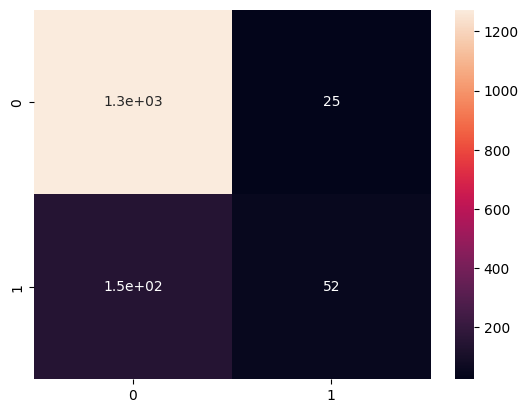

In [33]:
cfmknn = confusion_matrix(y_test , y_predknn)

sns.heatmap(cfmknn , annot = True)

Discussing with the confusion matrix of KNN we can find that as the classification report the values predicted as 1 instead of 0 are 25 and the values that are predicted as 0 instead of 1 are 150. The values correctly predicted for 0 are 1300 and for 1 it is 52. This is not a good model for prediction, since this does have much errors in prediction.

### Naive Bayes

In [34]:
nb = GaussianNB()
nb.fit(x_train , y_train)

y_prednb = nb.predict(x_test)

In [35]:
print('Fit of Traning set :' , nb.score(x_train , y_train))
print('Fit of Testing set :' , nb.score(x_test , y_test))

Fit of Traning set : 0.8731428571428571
Fit of Testing set : 0.8746666666666667


There is no problem of under fitting or over fitting in the model.

In [36]:
print(classification_report(y_test , y_prednb))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1298
           1       0.53      0.58      0.55       202

    accuracy                           0.87      1500
   macro avg       0.73      0.75      0.74      1500
weighted avg       0.88      0.87      0.88      1500



This Classification report of Naive Bayes Explians that the precision and recall value for 0 ( Retained ) is great and the precision value for the 1 ( Exited ) is lower than previous models. The score of macro and weighted average are good scores in this model.

<Axes: >

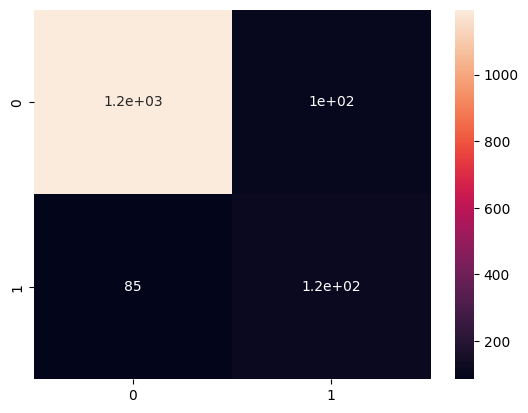

In [37]:
cfmnb = confusion_matrix(y_test , y_prednb)

sns.heatmap(cfmnb, annot = True )

Discussing with the confusion matrix of Naive Bayes we can find that as the classification report the values predicted as 1 instead of 0 are 85 and the values that are predicted as 0 instead of 1 are 100. The values correctly predicted for 0 are 1200 and for 1 it is 120. This is not a good model for prediction, since this does have much errors in prediction.

## ROC and AUC Score Analysis

For find the AUC Score we have to find the predicted probablity values each model, and compare with a ROC curves of each and compare the AUC Scores

In [39]:
# ROC

prolr = lr.predict_proba(x_test)[:,1]
prosvm = svm2.predict_proba(x_test)[:,1]
prorfc = rfc.predict_proba(x_test)[:,1]
proknn = knn.predict_proba(x_test)[:,1]
pronb = nb.predict_proba(x_test)[:,1]

In [40]:
fprlr , tprlr , threshlr = roc_curve(y_test , prolr , pos_label = 1)
fprsvm , tprsvm , threshsvm = roc_curve(y_test , prosvm , pos_label = 1)
fprrfc , tprrfc , threshrfc = roc_curve(y_test , prorfc , pos_label = 1)
fprknn , tprknn , threshknn = roc_curve(y_test , proknn , pos_label = 1)
fprnb , tprnb , threshnb = roc_curve(y_test , pronb , pos_label = 1)

In [41]:
print('AUC score for LR :' , roc_auc_score(y_test , prolr))
print('AUC score for SVM :' , roc_auc_score(y_test , prosvm))
print('AUC score for RFC :' , roc_auc_score(y_test , prorfc))
print('AUC score for KNN :' , roc_auc_score(y_test , proknn))
print('AUC score for NB :' , roc_auc_score(y_test , pronb))

AUC score for LR : 0.7231879967657783
AUC score for SVM : 0.7920601382172116
AUC score for RFC : 0.9335897572808128
AUC score for KNN : 0.6519054447817663
AUC score for NB : 0.8533005842957176


From the Above AUC Score list we can find that Random Forest Classifier has more AUC score that other models, therefore we can consider it as a good model for telecom churn prediction.

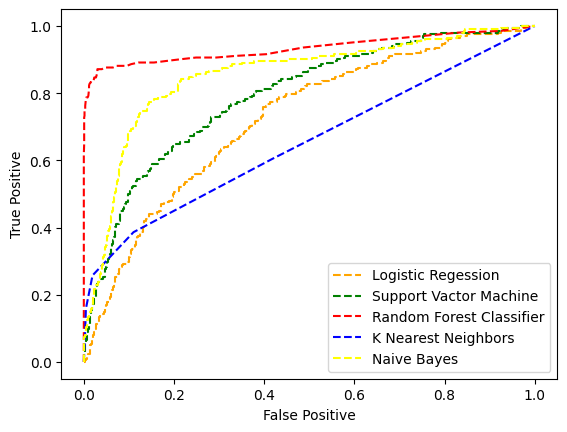

In [42]:
plt.plot(fprlr , tprlr ,
         linestyle = "--" ,
         color = 'Orange',
         label = "Logistic Regession")
plt.plot(fprsvm , tprsvm ,
         linestyle = "--" ,
         color = 'Green',
         label = "Support Vactor Machine")
plt.plot(fprrfc , tprrfc ,
         linestyle = "--" ,
         color = 'red',
         label = "Random Forest Classifier")
plt.plot(fprknn , tprknn ,
         linestyle = "--" ,
         color = 'blue',
         label = "K Nearest Neighbors")
plt.plot(fprnb , tprnb ,
         linestyle = "--" ,
         color = 'Yellow',
         label = "Naive Bayes")

plt.ylabel('True Positive')
plt.xlabel('False Positive')

plt.legend()


From the above graph we can find that the Random Forest classifier has more number of True positives than other models, thus we can conclude that Random Forest classifier is a great fit for Telecom Customer Churn Prediction.

## Conclusion

In conclusion from the comparitive analysis of various Machine Learning Classification methods in Predicting Telecom customers Churn we found that, The Random Forest Classifier predicts in a higher accuracy than other models. The Random Forest Classifier is significant in every metrics of eveluation in which in the classification report it has a high Presition value, Recall value, macro Average Value and Weighted Average value, in the Confusion matrix it has very low numbers mispredicted values, in the ROC curve the Random Forest classifier has more number of True Positives, and at last in the AUC Score we can find that Random Forest Classifier has the more score than other models. Thus we conclude, the Random Forest Classifier is the best model for Telecom customer churn Prediction.